<H1>Basic numpy implementation of XOR logic gate</H1> 

In [1]:
#import numpy library
import numpy as np

The activation function sigmoid transformes the input to the function into a value between 0 and 1. Since, the output of the XOR function is computed as a binary, thus it will be used for hidden layer units as well as output layer.

In [2]:
#sigmoid activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
#derivative of sigmoid function computed
def sigmoid_deriv(x):
    return sigmoid(x)*(1-sigmoid(x))

In forward propagation, the function propagates through the layers of the network computing 'A' and 'Z' values until we reach the end of the network to achieve the final output 'Y'.

In [4]:
#Forward Propagation
def forward(x,w1,w2):
    a1 = np.dot(w1,x)
    z1 = sigmoid(a1) 
    a2 = np.dot(w2,z1)
    z2 = sigmoid(a2)
    return a1,z1,a2,z2

In backpropagation, we calculate the loss in every iteration for each layer and update the weights accordingly in order to minimize the loss function value.

In [5]:
#Backpropagation
def backprop(w1,w2,a1,a2,z1,z2,y):
    delta2 = z2-y
    Delta2 = np.dot(delta2,z1.T)
    delta1 = np.dot(w2.T,delta2)*sigmoid_deriv(a1)
    Delta1 = np.dot(delta1,x.T)
    
    Delta1 = np.reshape(Delta1,w1.shape)
    Delta2 = np.reshape(Delta2,w2.shape)
    
    return delta2,Delta2,delta1,Delta1

The input of the XOR gate is given as matrix x and the required output as matrix y. The weights are initialized with random values which will be updated later by backpropagation. 

In [6]:
#input data
x = np.array([[0,0,1,1],[0,1,0,1]])
y = np.array([0,1,1,0])
w1 = np.random.rand(2,2)
w2 = np.random.rand(1,2)

In [7]:
lr = 0.09 #learning rate for backpropagation
costs = []
#One epoch is formed by one forward and one backward propagation
epochs = 15000 #Number of epochs
m = len(x) #number of training examples

Now, we run the model for 15000 epochs and calculate the loss. 

In [8]:
#training algorithm
for i in range(epochs):
    #performing forward propagation
    a1,z1,a2,z2 = forward(x,w1,w2)
    #loss calculation
    c = -(1/m)*np.sum(y*np.log(z2)+(1-y)*np.log(1-z2)) 
    costs.append(c)
    #performing backpropagation
    delta2,Delta2,delta1,Delta1 = backprop(w1,w2,a1,a2,z1,z2,y)
    #update weights
    w1-=lr*(1/m)*Delta1
    w2-=lr*(1/m)*Delta2

Plotting the loss function in order to see how the model is doing

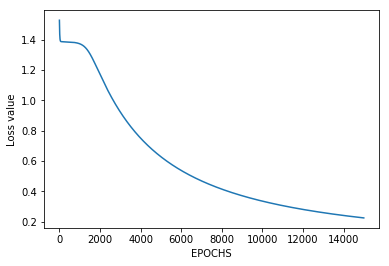

In [10]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

Thus, this graph shows that the loss function is decreasing for every iteration.

After the training, let's see how our model is doing.

In [11]:
def predict(input):
    a1,z1,a2,z2 = forward(input,w1,w2)
    z2 = np.squeeze(z2)
    if z2>=0.5:
        print(z2)
        print("For input", [i[0] for i in input], "output is 1")
    else:
        print(z2)
        print("For input", [i[0] for i in input], "output is 0")

Finally, we verify the predicted ouput of the trained model.

In [12]:
test = np.array([[0],[0]])
predict(test)
test = np.array([[0],[1]])
predict(test)
test = np.array([[1],[0]])
predict(test)
test = np.array([[1],[1]])
predict(test)

0.05223252674735348
For input [0, 0] output is 0
0.8971315996127992
For input [0, 1] output is 1
0.89713174075504
For input [1, 0] output is 1
0.1633714460854362
For input [1, 1] output is 0
